**LOAN DEFAULT**

Problem Statement:

    >>> To identify the risk of losing money while lending money to customers.
    >>>To conduct a thorough exploratory data analysis (EDA) and deep analysis of a comprehensive loan default dataset containing basic customer details and credit-related information. The aim is to create new, informative features, analyse borrowers' repayment capacity, and uncover meaningful patterns, anomalies, and insights within the data.

In [115]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [116]:
df = pd.read_csv(r"C:\Users\Chitra\OneDrive\Documents\ScalerNotes\Domain Analytics\Fintech Capstone Project\loan.csv")

In [117]:
df.head()

,ID,year,loan_limit,Gender,loan_type,loan_purpose,business_or_commercial,loan_amount,rate_of_interest,Upfront_charges,property_value,occupancy_type,income,credit_type,Credit_Score,co-applicant_credit_type,age,LTV,Region,Status
0,24890,2019,cf,Sex Not Available,type1,p1,nob/c,116500,NaN,NaN,118000.0,pr,1740.0,EXP,758,CIB,25-34,98.728814,south,1
1,24891,2019,cf,Male,type2,p1,b/c,206500,NaN,NaN,NaN,pr,4980.0,EQUI,552,EXP,55-64,NaN,North,1
2,24892,2019,cf,Male,type1,p1,nob/c,406500,4.56,595.0,508000.0,pr,9480.0,EXP,834,CIB,35-44,80.019685,south,0
3,24893,2019,cf,Male,type1,p4,nob/c,456500,4.25,NaN,658000.0,pr,11880.0,EXP,587,CIB,45-54,69.376900,North,0
4,24894,2019,cf,Joint,type1,p1,nob/c,696500,4.00,0.0,758000.0,pr,10440.0,CRIF,602,EXP,25-34,91.886544,North,0


In [118]:
df.shape

(148670, 20)

In [119]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148670 entries, 0 to 148669
Data columns (total 20 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   ID                        148670 non-null  int64  
 1   year                      148670 non-null  int64  
 2   loan_limit                145326 non-null  object 
 3   Gender                    148670 non-null  object 
 4   loan_type                 148670 non-null  object 
 5   loan_purpose              148536 non-null  object 
 6   business_or_commercial    148670 non-null  object 
 7   loan_amount               148670 non-null  int64  
 8   rate_of_interest          112231 non-null  float64
 9   Upfront_charges           109028 non-null  float64
 10  property_value            133572 non-null  float64
 11  occupancy_type            148670 non-null  object 
 12  income                    139520 non-null  float64
 13  credit_type               148670 non-null  o

In [120]:
df.describe()

,ID,year,loan_amount,rate_of_interest,Upfront_charges,property_value,income,Credit_Score,LTV,Status
count,148670.000000,148670.0,1.486700e+05,112231.000000,109028.000000,1.335720e+05,139520.000000,148670.000000,133572.000000,148670.000000
mean,99224.500000,2019.0,3.311177e+05,4.045476,3224.996127,4.978935e+05,6957.338876,699.789103,72.746457,0.246445
std,42917.476598,0.0,1.839093e+05,0.561391,3251.121510,3.599353e+05,6496.586382,115.875857,39.967603,0.430942
min,24890.000000,2019.0,1.650000e+04,0.000000,0.000000,8.000000e+03,0.000000,500.000000,0.967478,0.000000
25%,62057.250000,2019.0,1.965000e+05,3.625000,581.490000,2.680000e+05,3720.000000,599.000000,60.474860,0.000000
50%,99224.500000,2019.0,2.965000e+05,3.990000,2596.450000,4.180000e+05,5760.000000,699.000000,75.135870,0.000000
75%,136391.750000,2019.0,4.365000e+05,4.375000,4812.500000,6.280000e+05,8520.000000,800.000000,86.184211,0.000000
max,173559.000000,2019.0,3.576500e+06,8.000000,60000.000000,1.650800e+07,578580.000000,900.000000,7831.250000,1.000000


In [121]:
df.duplicated().sum()

0

In [122]:
round(df.isnull().sum()/len(df),2)

ID                          0.00
year                        0.00
loan_limit                  0.02
Gender                      0.00
loan_type                   0.00
loan_purpose                0.00
business_or_commercial      0.00
loan_amount                 0.00
rate_of_interest            0.25
Upfront_charges             0.27
property_value              0.10
occupancy_type              0.00
income                      0.06
credit_type                 0.00
Credit_Score                0.00
co-applicant_credit_type    0.00
age                         0.00
LTV                         0.10
Region                      0.00
Status                      0.00
dtype: float64

In [123]:
df.isnull().sum()

ID                              0
year                            0
loan_limit                   3344
Gender                          0
loan_type                       0
loan_purpose                  134
business_or_commercial          0
loan_amount                     0
rate_of_interest            36439
Upfront_charges             39642
property_value              15098
occupancy_type                  0
income                       9150
credit_type                     0
Credit_Score                    0
co-applicant_credit_type        0
age                           200
LTV                         15098
Region                          0
Status                          0
dtype: int64

In [124]:
df.columns[df.isnull().any()]

Index(['loan_limit', 'loan_purpose', 'rate_of_interest', 'Upfront_charges',
       'property_value', 'income', 'age', 'LTV'],
      dtype='object')

In [125]:
Col_nan = df.columns[df.isnull().any()]

In [126]:
Col_nan

Index(['loan_limit', 'loan_purpose', 'rate_of_interest', 'Upfront_charges',
       'property_value', 'income', 'age', 'LTV'],
      dtype='object')

In [127]:
df.nunique()

ID                          148670
year                             1
loan_limit                       2
Gender                           4
loan_type                        3
loan_purpose                     4
business_or_commercial           2
loan_amount                    211
rate_of_interest               131
Upfront_charges              58271
property_value                 385
occupancy_type                   3
income                        1001
credit_type                      4
Credit_Score                   401
co-applicant_credit_type         2
age                              7
LTV                           8484
Region                           4
Status                           2
dtype: int64

In [128]:
'''for i in range(len(Col_nan)):
    df[Col_nan[i]].fillna('',inplace =True)'''

"for i in range(len(Col_nan)):\n    df[Col_nan[i]].fillna('',inplace =True)"

In [129]:
df['ID'].value_counts()

ID
24890     1
123979    1
123999    1
124000    1
124001    1
         ..
74447     1
74448     1
74449     1
74450     1
173559    1
Name: count, Length: 148670, dtype: int64

In [130]:
df.groupby('loan_limit')['Gender'].count()

loan_limit
cf     135348
ncf      9978
Name: Gender, dtype: int64

In [131]:
for i in df.select_dtypes(include="object").columns[:10]:
    print("null -",df[i].isnull().sum())
    print(df[i].value_counts())
    print("****"*10)

null - 3344
loan_limit
cf     135348
ncf      9978
Name: count, dtype: int64
****************************************
null - 0
Gender
Male                 42346
Joint                41399
Sex Not Available    37659
Female               27266
Name: count, dtype: int64
****************************************
null - 0
loan_type
type1    113173
type2     20762
type3     14735
Name: count, dtype: int64
****************************************
null - 134
loan_purpose
p3    55934
p4    54799
p1    34529
p2     3274
Name: count, dtype: int64
****************************************
null - 0
business_or_commercial
nob/c    127908
b/c       20762
Name: count, dtype: int64
****************************************
null - 0
occupancy_type
pr    138201
ir      7340
sr      3129
Name: count, dtype: int64
****************************************
null - 0
credit_type
CIB     48152
CRIF    43901
EXP     41319
EQUI    15298
Name: count, dtype: int64
****************************************
null - 0
co-a

In [132]:
df.select_dtypes(include="number").columns

Index(['ID', 'year', 'loan_amount', 'rate_of_interest', 'Upfront_charges',
       'property_value', 'income', 'Credit_Score', 'LTV', 'Status'],
      dtype='object')

In [133]:
for i in df.select_dtypes(include="number").columns[1:20]:
    print("null -",df[i].isnull().sum())
    print(df[i].value_counts())
    print("****"*10)

null - 0
year
2019    148670
Name: count, dtype: int64
****************************************
null - 0
loan_amount
206500     4610
256500     4079
156500     3967
226500     3944
486500     3819
           ... 
2206500       1
1746500       1
2396500       1
3576500       1
1956500       1
Name: count, Length: 211, dtype: int64
****************************************
null - 36439
rate_of_interest
3.990    14455
3.625     8800
3.875     8592
3.750     8474
3.500     6866
         ...  
4.700        1
8.000        1
7.750        1
5.300        1
2.700        1
Name: count, Length: 131, dtype: int64
****************************************
null - 39642
Upfront_charges
0.00       20770
1250.00     1184
1150.00      892
795.00       487
295.00       403
           ...  
4447.72        1
3173.84        1
3421.81        1
198.96         1
4323.33        1
Name: count, Length: 58271, dtype: int64
****************************************
null - 15098
property_value
308000.0     2792
258000.0

In [134]:
cat_col = df.select_dtypes(include="object").columns

In [135]:
for i in range(len(cat_col)):
    df[cat_col[i]].fillna('Unknown',inplace =True)

In [136]:
for i in cat_col:
    print("null -",df[i].isnull().sum())
    print(df[i].value_counts())
    print('***'*10)

null - 0
loan_limit
cf         135348
ncf          9978
Unknown      3344
Name: count, dtype: int64
******************************
null - 0
Gender
Male                 42346
Joint                41399
Sex Not Available    37659
Female               27266
Name: count, dtype: int64
******************************
null - 0
loan_type
type1    113173
type2     20762
type3     14735
Name: count, dtype: int64
******************************
null - 0
loan_purpose
p3         55934
p4         54799
p1         34529
p2          3274
Unknown      134
Name: count, dtype: int64
******************************
null - 0
business_or_commercial
nob/c    127908
b/c       20762
Name: count, dtype: int64
******************************
null - 0
occupancy_type
pr    138201
ir      7340
sr      3129
Name: count, dtype: int64
******************************
null - 0
credit_type
CIB     48152
CRIF    43901
EXP     41319
EQUI    15298
Name: count, dtype: int64
******************************
null - 0
co-applicant_cre

In [137]:
num_col = df.select_dtypes(include="number").columns

In [138]:
num_col

Index(['ID', 'year', 'loan_amount', 'rate_of_interest', 'Upfront_charges',
       'property_value', 'income', 'Credit_Score', 'LTV', 'Status'],
      dtype='object')

In [139]:
df_num_col = df.select_dtypes(include="number")

In [140]:
df_num_col.columns

Index(['ID', 'year', 'loan_amount', 'rate_of_interest', 'Upfront_charges',
       'property_value', 'income', 'Credit_Score', 'LTV', 'Status'],
      dtype='object')

**Insights on Non Graphical Analysis:**

1. Dataset has 148670 rows and 20 columns.
2. Also we can see few null values in columns - loan_limit,loan_purpose,
	rate_of_interest,Upfront_charges,property_value,income,age and LTV.
3. Using KNN imputer to impute the null values
4. contains 10 numerical columns and 10 categorical column.
5. ID column is completely unique so there is no need of grouping the data
6. Data available for the year 2019.

In [141]:
from sklearn.impute import KNNImputer

In [142]:
impute_knn = KNNImputer(n_neighbors = 3)
imp_df = impute_knn.fit_transform(df_num_col)

In [143]:
imp_df.shape

(148670, 10)

In [144]:
df1 = pd.DataFrame(imp_df)

In [145]:
df1.head(1)

,0,1,2,3,4,5,6,7,8,9
0,24890.0,2019.0,116500.0,4.201667,3405.226667,118000.0,1740.0,758.0,98.728814,1.0


In [146]:
df1.isnull().sum()

0    0
1    0
2    0
3    0
4    0
5    0
6    0
7    0
8    0
9    0
dtype: int64

In [147]:
df1.rename(columns = {0:'ID',1:'year',2:'loan_amount',3:'rate_of_interest',4:'Upfront_charges',
                         5:'property_value',6:'income',7:'Credit_Score',8:'LTV',9:'Status'},inplace = True)

In [148]:
df1.head(1)

,ID,year,loan_amount,rate_of_interest,Upfront_charges,property_value,income,Credit_Score,LTV,Status
0,24890.0,2019.0,116500.0,4.201667,3405.226667,118000.0,1740.0,758.0,98.728814,1.0


In [149]:
'''for i in num_col:
    df[i].fillna(df[i].mean(),inplace = True)'''

'for i in num_col:\n    df[i].fillna(df[i].mean(),inplace = True)'

In [150]:
df1.isnull().sum()

ID                  0
year                0
loan_amount         0
rate_of_interest    0
Upfront_charges     0
property_value      0
income              0
Credit_Score        0
LTV                 0
Status              0
dtype: int64

In [151]:
df['ID'] = df['ID'].astype('object')

In [152]:
df.select_dtypes(include='object').isnull().sum()

ID                          0
loan_limit                  0
Gender                      0
loan_type                   0
loan_purpose                0
business_or_commercial      0
occupancy_type              0
credit_type                 0
co-applicant_credit_type    0
age                         0
Region                      0
dtype: int64

In [153]:
df_cat_col = df.select_dtypes(include='object')

In [154]:
from sklearn.impute import SimpleImputer

In [155]:
cat_imp = SimpleImputer(strategy = 'most_frequent')

In [156]:
df_cat = cat_imp.fit_transform(df_cat_col)

In [157]:
df_cat.shape

(148670, 11)

In [158]:
df2 = pd.DataFrame(df_cat)

In [159]:
df2.head(1)

,0,1,2,3,4,5,6,7,8,9,10
0,24890,cf,Sex Not Available,type1,p1,nob/c,pr,EXP,CIB,25-34,south


In [160]:
df2.rename(columns ={0:'ID',1:'loan_limit',2:'Gender',3:'loan_type',4:'loan_purpose',
                     5:'business_or_commercial',6:'occupancy_type',7:'credit_type',
                     8:'co-applicant_credit_type',9:'age',10:'Region'},inplace =True)

In [161]:
df2.isnull().sum()

ID                          0
loan_limit                  0
Gender                      0
loan_type                   0
loan_purpose                0
business_or_commercial      0
occupancy_type              0
credit_type                 0
co-applicant_credit_type    0
age                         0
Region                      0
dtype: int64

In [162]:
dfs = pd.merge(df1,df2,on='ID')

In [163]:
dfs.shape

(148670, 20)

In [164]:
dfs.head()

,ID,year,loan_amount,rate_of_interest,Upfront_charges,property_value,income,Credit_Score,LTV,Status,loan_limit,Gender,loan_type,loan_purpose,business_or_commercial,occupancy_type,credit_type,co-applicant_credit_type,age,Region
0,24890.0,2019.0,116500.0,4.201667,3405.226667,118000.000000,1740.0,758.0,98.728814,1.0,cf,Sex Not Available,type1,p1,nob/c,pr,EXP,CIB,25-34,south
1,24891.0,2019.0,206500.0,3.996667,558.893333,281333.333333,4980.0,552.0,77.321504,1.0,cf,Male,type2,p1,b/c,pr,EQUI,EXP,55-64,North
2,24892.0,2019.0,406500.0,4.560000,595.000000,508000.000000,9480.0,834.0,80.019685,0.0,cf,Male,type1,p1,nob/c,pr,EXP,CIB,35-44,south
3,24893.0,2019.0,456500.0,4.250000,124.500000,658000.000000,11880.0,587.0,69.376900,0.0,cf,Male,type1,p4,nob/c,pr,EXP,CIB,45-54,North
4,24894.0,2019.0,696500.0,4.000000,0.000000,758000.000000,10440.0,602.0,91.886544,0.0,cf,Joint,type1,p1,nob/c,pr,CRIF,EXP,25-34,North


In [165]:
dfs['ID']= dfs['ID'].astype('int')

In [166]:
dfs['Status'] = dfs['Status'].astype('object')

In [167]:
dfs.isnull().sum()

ID                          0
year                        0
loan_amount                 0
rate_of_interest            0
Upfront_charges             0
property_value              0
income                      0
Credit_Score                0
LTV                         0
Status                      0
loan_limit                  0
Gender                      0
loan_type                   0
loan_purpose                0
business_or_commercial      0
occupancy_type              0
credit_type                 0
co-applicant_credit_type    0
age                         0
Region                      0
dtype: int64

In [168]:
cat_col = dfs.select_dtypes(include ='object').columns

In [169]:
num_col = dfs.select_dtypes(include ='number').columns

In [170]:
cat_col

Index(['Status', 'loan_limit', 'Gender', 'loan_type', 'loan_purpose',
       'business_or_commercial', 'occupancy_type', 'credit_type',
       'co-applicant_credit_type', 'age', 'Region'],
      dtype='object')

In [171]:
num_col

Index(['ID', 'year', 'loan_amount', 'rate_of_interest', 'Upfront_charges',
       'property_value', 'income', 'Credit_Score', 'LTV'],
      dtype='object')

In [172]:
len(cat_col)

11

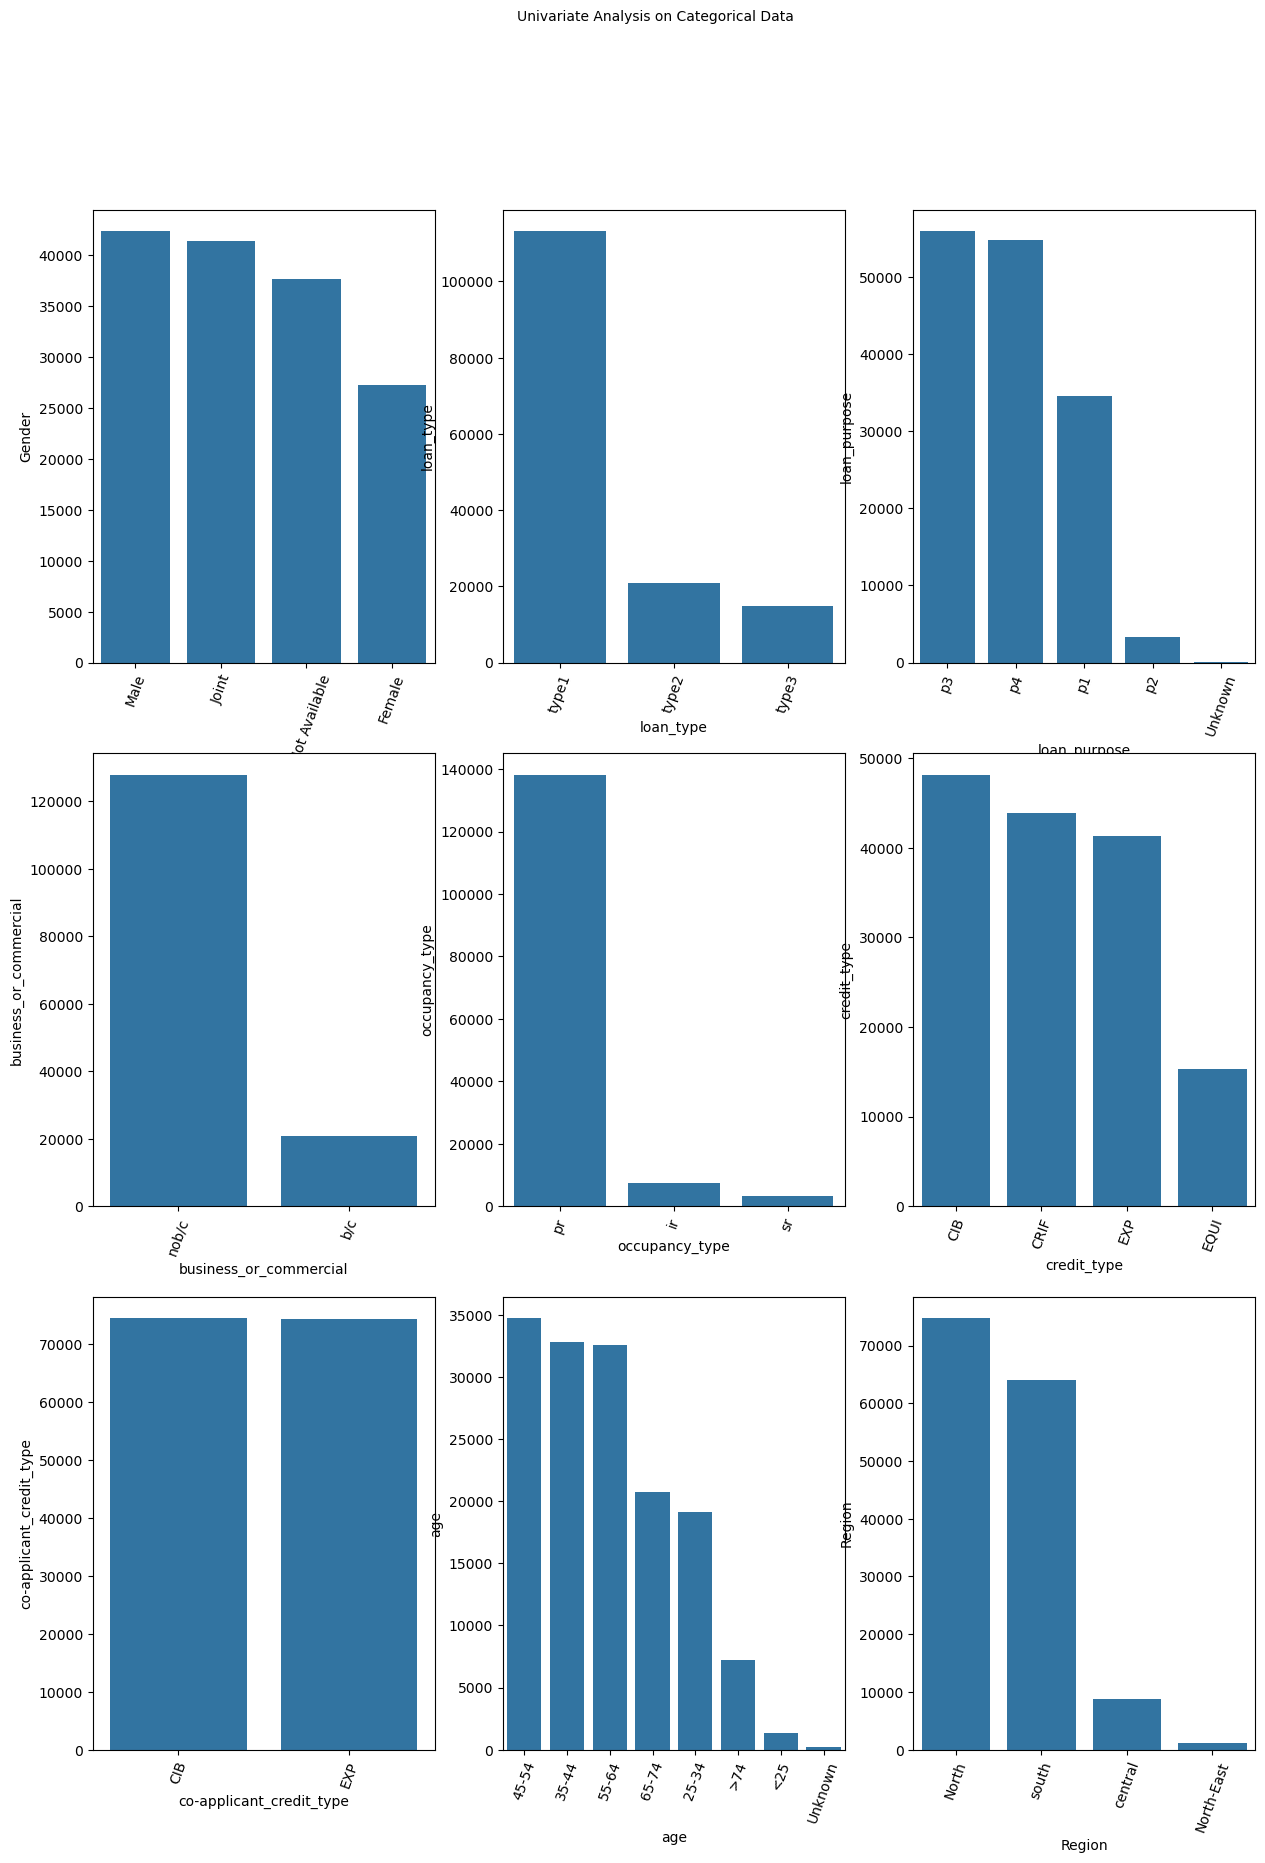

In [282]:
plt.figure(figsize = (15,20)).suptitle("Univariate Analysis on Categorical Data",fontsize = 10)
j=1
for i in cat_col.tolist()[2:]:
    ax = plt.subplot(3,3,j)
    sns.countplot(x = dfs[i],order = dfs[i].value_counts().index)
    '''plt.pie(df[i])'''
    plt.xticks(rotation = 70,fontsize = 10)
    plt.ylabel(i,fontsize=10)
    j+=1
    if j==len(cat_col):
        break

plt.show()

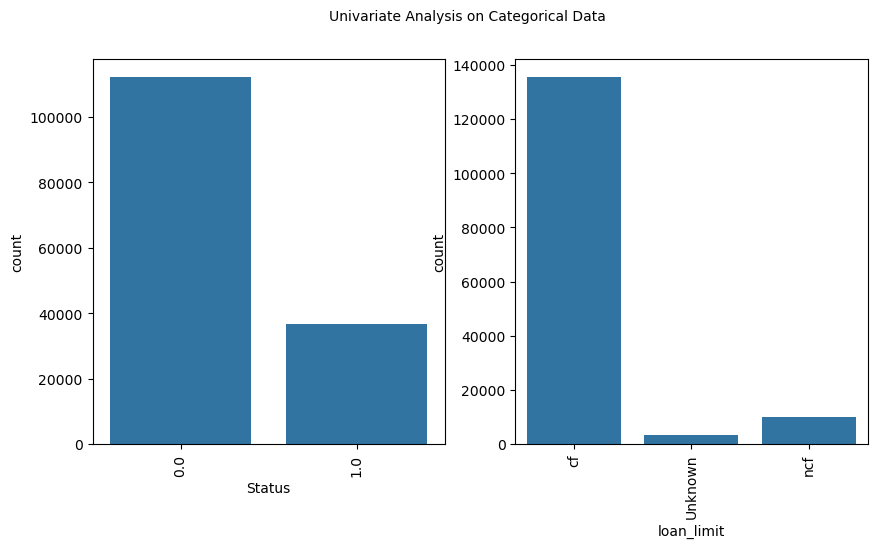

In [174]:
plt.figure(figsize = (10,5)).suptitle("Univariate Analysis on Categorical Data",fontsize = 10)
j=1
for i in cat_col.tolist()[:2]:
    ax = plt.subplot(1,2,j)
    sns.countplot(x = dfs[i])
    '''plt.pie(df[i])'''
    plt.xticks(rotation = 90,fontsize = 10)
    j+=1
    if j==len(cat_col)-8:
        break

plt.show()

**Insights on Univariate Analysis on Categorical data:**

    1. We can see Male and joint gender type has high counts.
	2. type1 loan is most preferred.
	3. Customers' loan purpose fits higher between p3 and p4.
	4. Commercial establishments seeks loan more than the customers doing business.
	5. pr is the highest Occupancy type of the establishments that looks for loan.
	6. CIB, CRIF and EXP are the top three credit types.
	7. Both the Co-applicant credit type have equal impacts.
	8. Customers between the age group 35 - 64 are in top 3 position.
    9. Defaulters' count is less than the customer paying on time.
    10.cf is the loan limit with highest count

In [175]:
num_col

Index(['ID', 'year', 'loan_amount', 'rate_of_interest', 'Upfront_charges',
       'property_value', 'income', 'Credit_Score', 'LTV'],
      dtype='object')

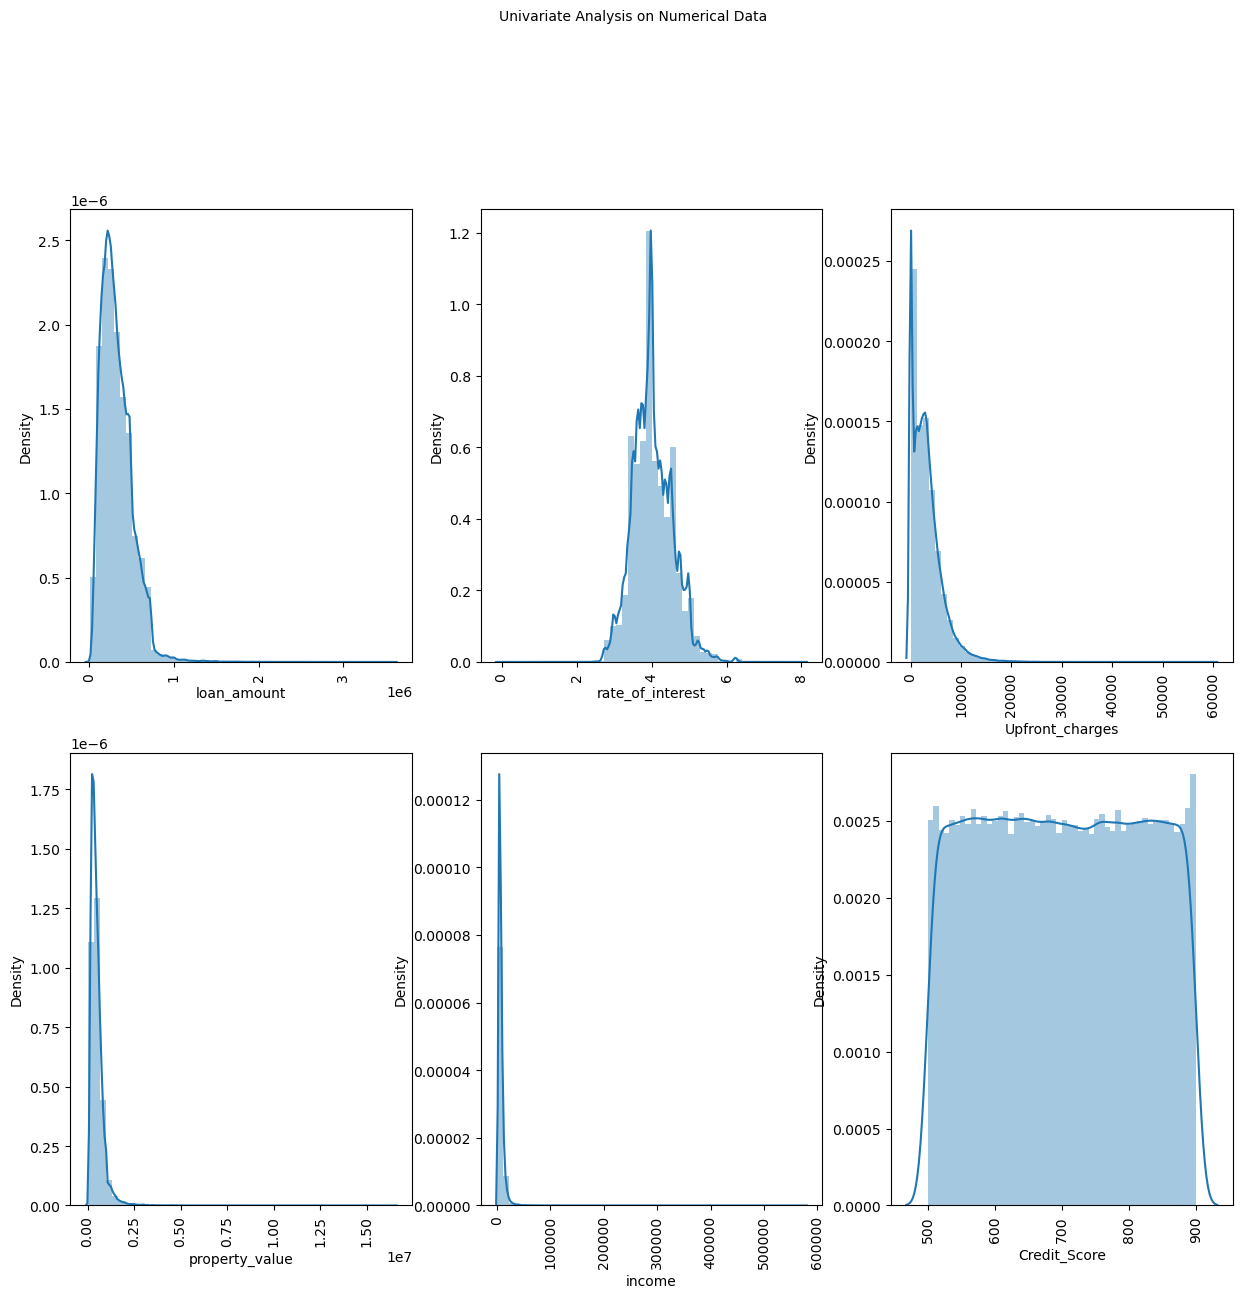

In [176]:
plt.figure(figsize = (15,20)).suptitle("Univariate Analysis on Numerical Data",fontsize = 10)
j=1
for i in num_col.tolist()[2:]:
    ax = plt.subplot(3,3,j)
    sns.distplot(x = dfs[i])
    plt.xticks(rotation = 90,fontsize = 10)
    plt.xlabel(i)
    j+=1
    if j==len(num_col)-2:
        break

plt.show()

**Insight on Numerical data**

1. Most of the distributions follows log normal except for rate_of_interest.
2. ROI takes normal distribution and credit score values are distributed between 500 - 900.

**Outlier Detection**

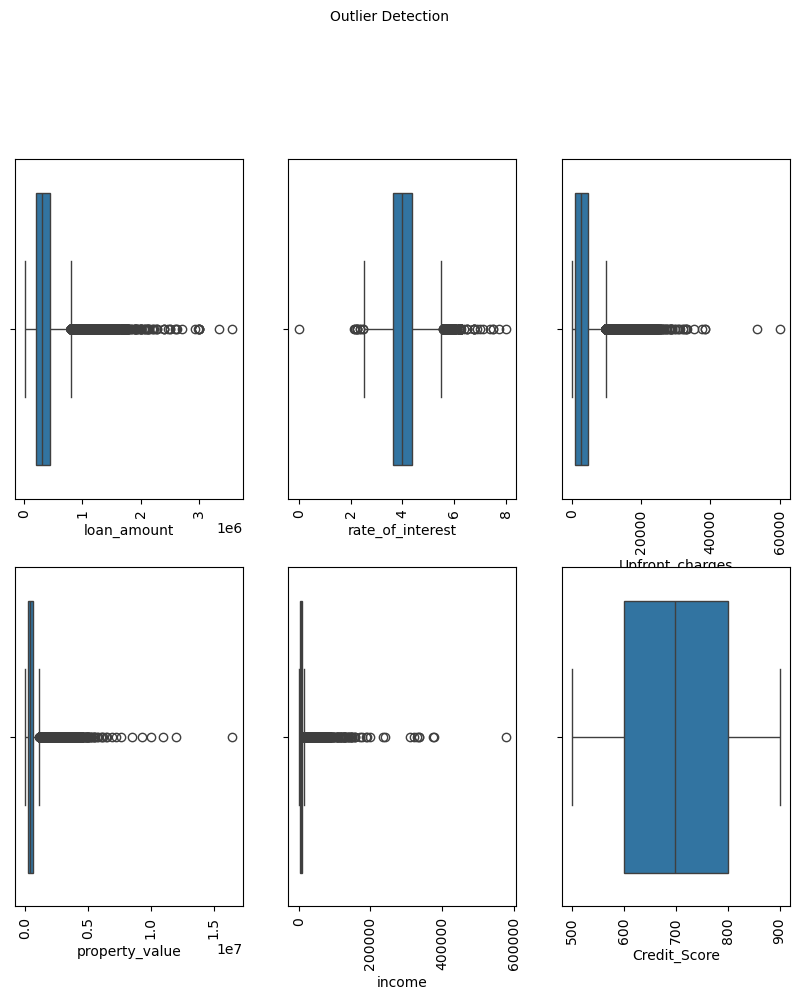

In [177]:
plt.figure(figsize = (10,15)).suptitle("Outlier Detection",fontsize = 10)
j=1
for i in num_col.tolist()[2:]:
    ax = plt.subplot(3,3,j)
    sns.boxplot(x = dfs[i])
    plt.xticks(rotation = 90,fontsize = 10)
    j+=1
    if j==len(num_col)-2:
        break

plt.show()

**Non graphical outlier detection**

In [298]:
print("Total rows:",len(dfs))
for i in num_col.tolist()[2:]:
    print("col:",i)
    q1 = df[i].quantile(0.25)
    q3 = df[i].quantile(0.75)
    iqr = q3-q1
    print("IQR:",iqr)
    lower = q1 - 1.5*iqr
    upper = q3 + 1.5*iqr
    print("upper outlier counts -",len(list(np.where(df[i] > upper)[0])))
    print("%:", np.round(len(list(np.where(df[i] > upper)[0]))/len(df),2))
    print("lower outlier counts-",len(list(np.where(df[i] < lower)[0])))
    print("***"*10)
    

Total rows: 148670
col: loan_amount
IQR: 240000.0
upper outlier counts - 1895
%: 0.01
lower outlier counts- 0
******************************
col: rate_of_interest
IQR: 0.75
upper outlier counts - 846
%: 0.01
lower outlier counts- 10
******************************
col: Upfront_charges
IQR: 4231.01
upper outlier counts - 2880
%: 0.02
lower outlier counts- 0
******************************
col: property_value
IQR: 360000.0
upper outlier counts - 5266
%: 0.04
lower outlier counts- 0
******************************
col: income
IQR: 4800.0
upper outlier counts - 6546
%: 0.04
lower outlier counts- 0
******************************
col: Credit_Score
IQR: 201.0
upper outlier counts - 0
%: 0.0
lower outlier counts- 0
******************************
col: LTV
IQR: 25.709350190000002
upper outlier counts - 120
%: 0.0
lower outlier counts- 1762
******************************


**Insights on Outliers**

1. Upfront charges, Property value, income has the highest count of outlier. 
But if we see the % of outliers on the overall data, its very minimum %.

**Correlation**

In [179]:
df_num = dfs.select_dtypes(include = 'number')

In [180]:
df_corr = df_num.iloc[:,2:].corr()

<Axes: >

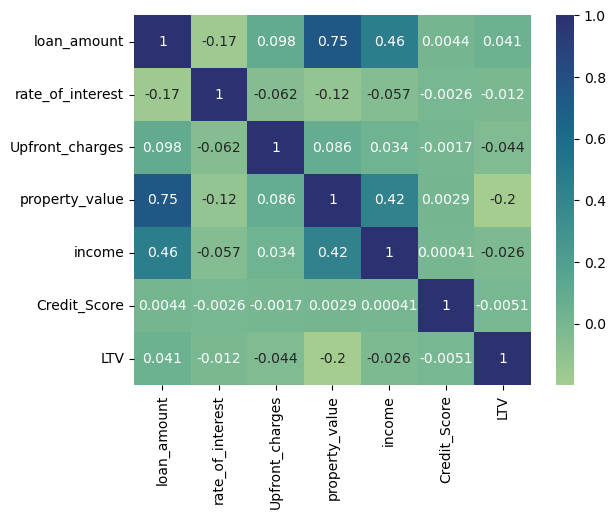

In [181]:
sns.heatmap(df_corr,annot =True,cmap = "crest")

**Insight**

loan_amount column and property value column seems to have 75% correlation value while income, loan and property also have nearly 40% correlation with loan_amount

**Bivariate Analysis**

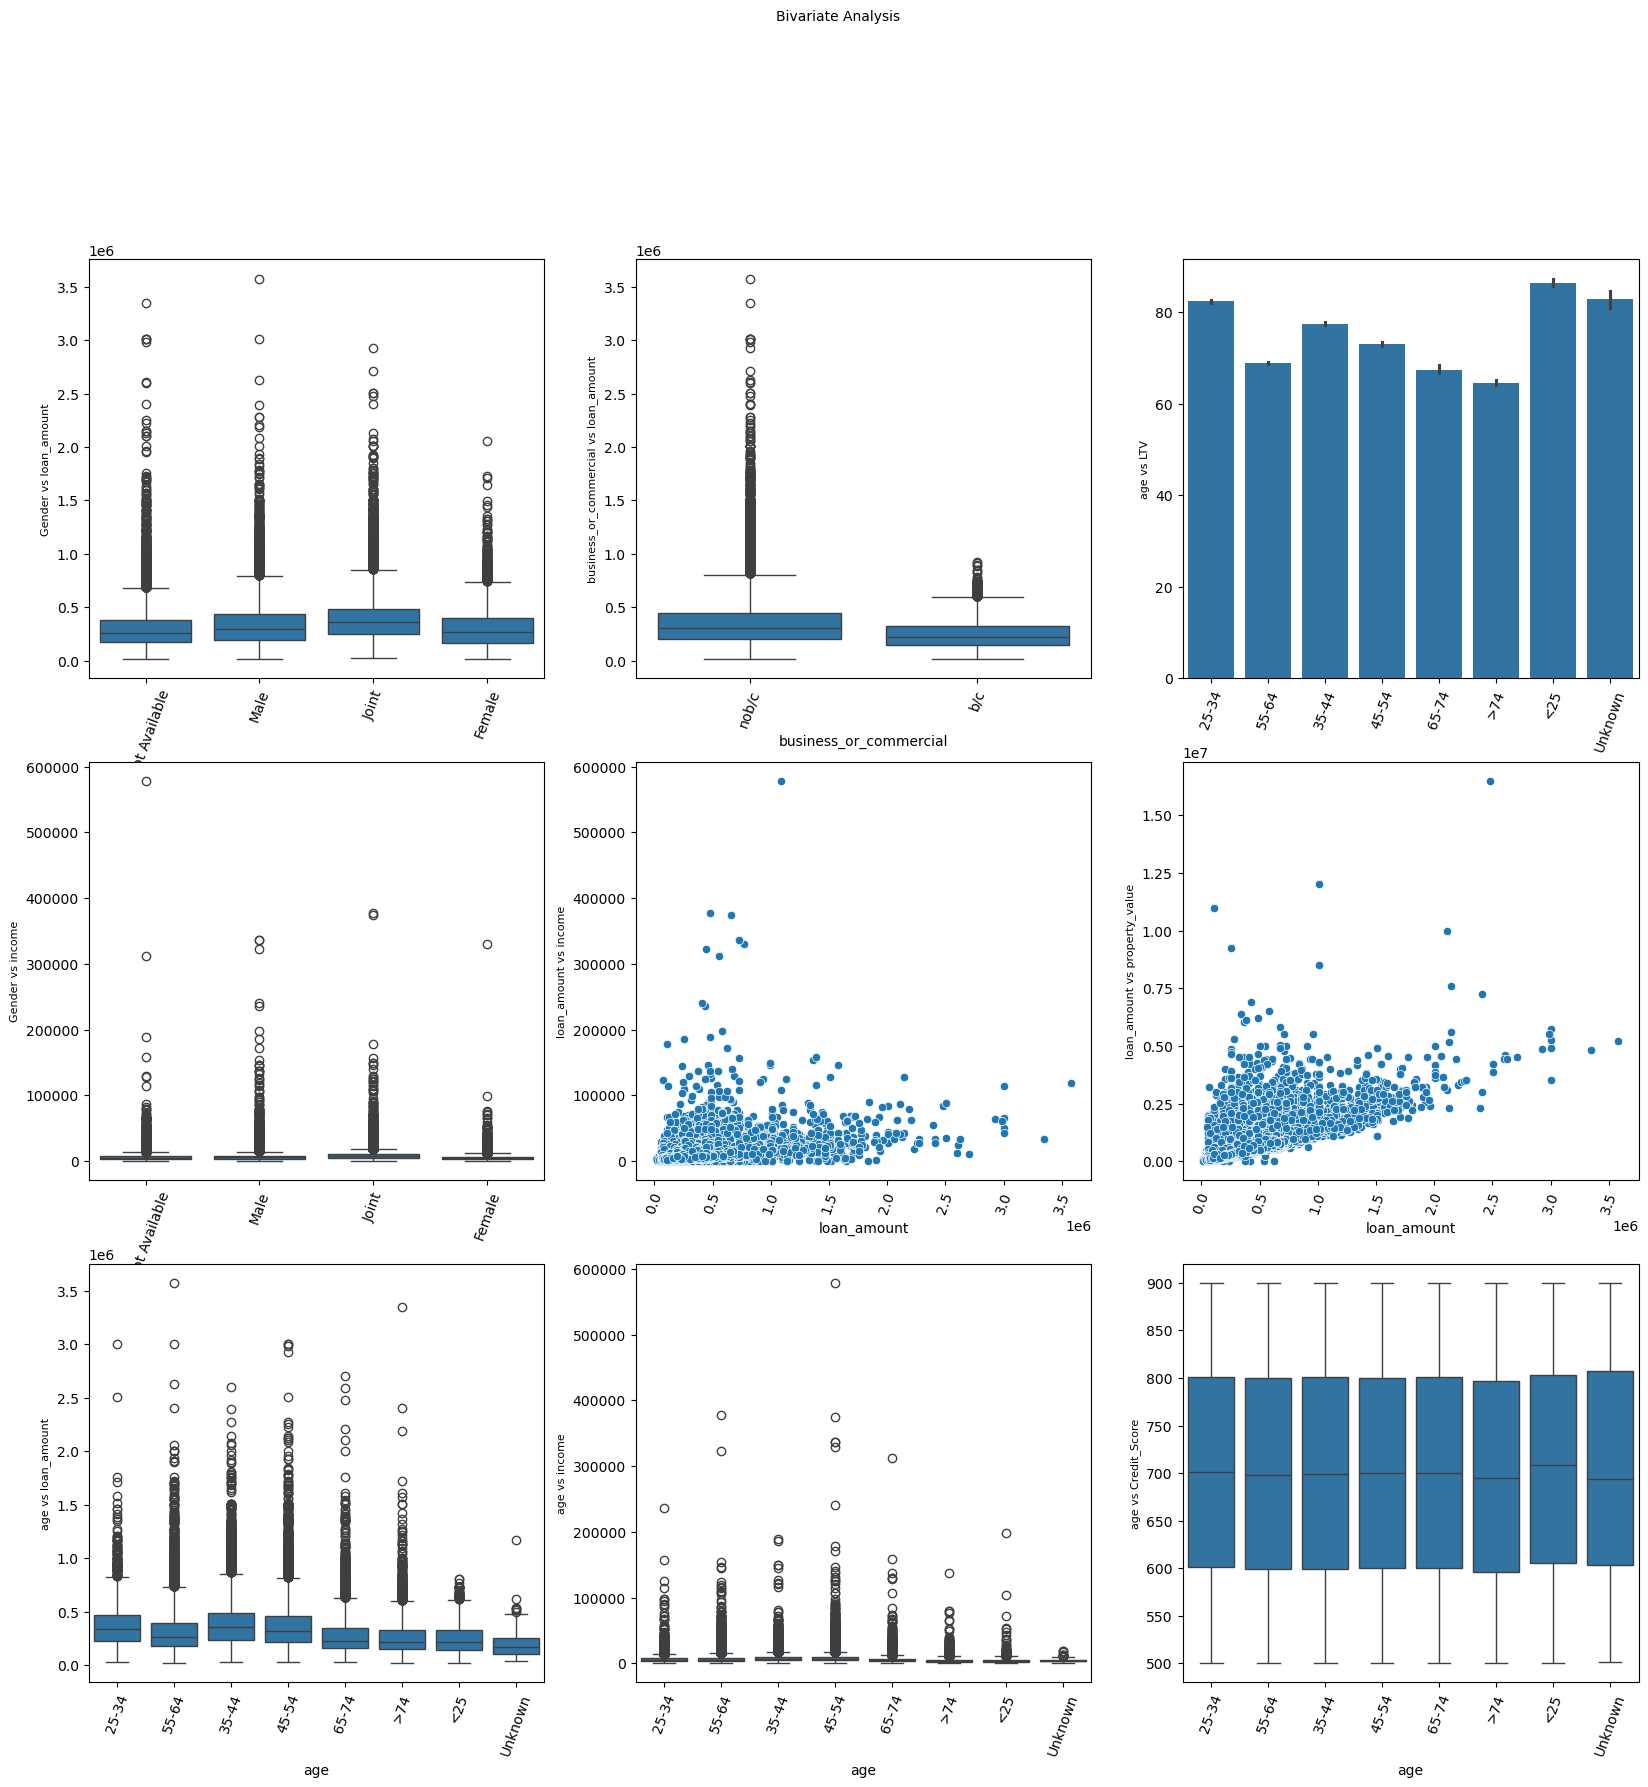

In [312]:
plt.figure(figsize = (20,25)).suptitle("Bivariate Analysis",fontsize = 10)
ax = plt.subplot(4,3,1)
sns.boxplot(x= dfs['Gender'], y = dfs['loan_amount'])
plt.xticks(rotation = 70,fontsize = 10)
plt.ylabel("Gender vs loan_amount",fontsize = 8)

ax = plt.subplot(4,3,2)
sns.boxplot(x= dfs['business_or_commercial'], y = df['loan_amount'])
plt.xticks(rotation = 70,fontsize = 10)
plt.ylabel("business_or_commercial vs loan_amount",fontsize = 8)

ax = plt.subplot(4,3,3)
sns.barplot(x= dfs['age'], y = dfs['LTV'])
plt.xticks(rotation = 70,fontsize = 10)
plt.ylabel("age vs LTV",fontsize = 8)


ax = plt.subplot(4,3,4)
sns.boxplot(x= dfs['Gender'], y = dfs['income'])
plt.xticks(rotation = 70,fontsize = 10)
plt.ylabel("Gender vs income",fontsize = 8)

ax = plt.subplot(4,3,5)
sns.scatterplot(x= dfs['loan_amount'], y = dfs['income'])
plt.xticks(rotation = 70,fontsize = 10)
plt.ylabel("loan_amount vs income",fontsize = 8)

ax = plt.subplot(4,3,6)
sns.scatterplot(x= dfs['loan_amount'], y = dfs['property_value'])
plt.xticks(rotation = 70,fontsize = 10)
plt.ylabel("loan_amount vs property_value",fontsize = 8)

ax = plt.subplot(4,3,7)
sns.boxplot(x= dfs['age'], y = dfs['loan_amount'])
plt.xticks(rotation = 70,fontsize = 10)
plt.ylabel("age vs loan_amount",fontsize = 8)

ax = plt.subplot(4,3,8)
sns.boxplot(x= dfs['age'], y = dfs['income'])
plt.xticks(rotation = 70,fontsize = 10)
plt.ylabel("age vs income",fontsize = 8)

ax = plt.subplot(4,3,9)
sns.boxplot(x= dfs['age'], y = dfs['Credit_Score'])
plt.xticks(rotation = 70,fontsize = 10)
plt.ylabel("age vs Credit_Score",fontsize = 8)




plt.show()

**Insight on Bivariate Analysis**

1. Gender types Male and joint seems to get higher value of loan amount.
2. Commercial establishments picks higher loan values than the customer doing business.
3. Customers in the age group below 25 seems to have higher LTV and the customers between the age 25 - 54 also have second, third, fourth highest place in LTV.
4. Male customers and joint customers seems to have higher income.
5. Even though loan amount and income are not highly correlated variables, they are slightly positively correlated.
6. loan amount and property value seems to be positively correlated.
7. Customers between the age group 25 -54 seems to pick higher loan values.
8. Though most of the customers income falls within same range, customer from age group 45-54 seems to have higher income.
9. Most of the age groups having average credit score around 700.

In [183]:
dfs['age'].value_counts()

age
45-54      34720
35-44      32818
55-64      32534
65-74      20744
25-34      19142
>74         7175
<25         1337
Unknown      200
Name: count, dtype: int64

In [184]:
dfs.columns

Index(['ID', 'year', 'loan_amount', 'rate_of_interest', 'Upfront_charges',
       'property_value', 'income', 'Credit_Score', 'LTV', 'Status',
       'loan_limit', 'Gender', 'loan_type', 'loan_purpose',
       'business_or_commercial', 'occupancy_type', 'credit_type',
       'co-applicant_credit_type', 'age', 'Region'],
      dtype='object')

In [185]:
dfs[dfs['age']=='25-34']['Credit_Score'].max()

900.0

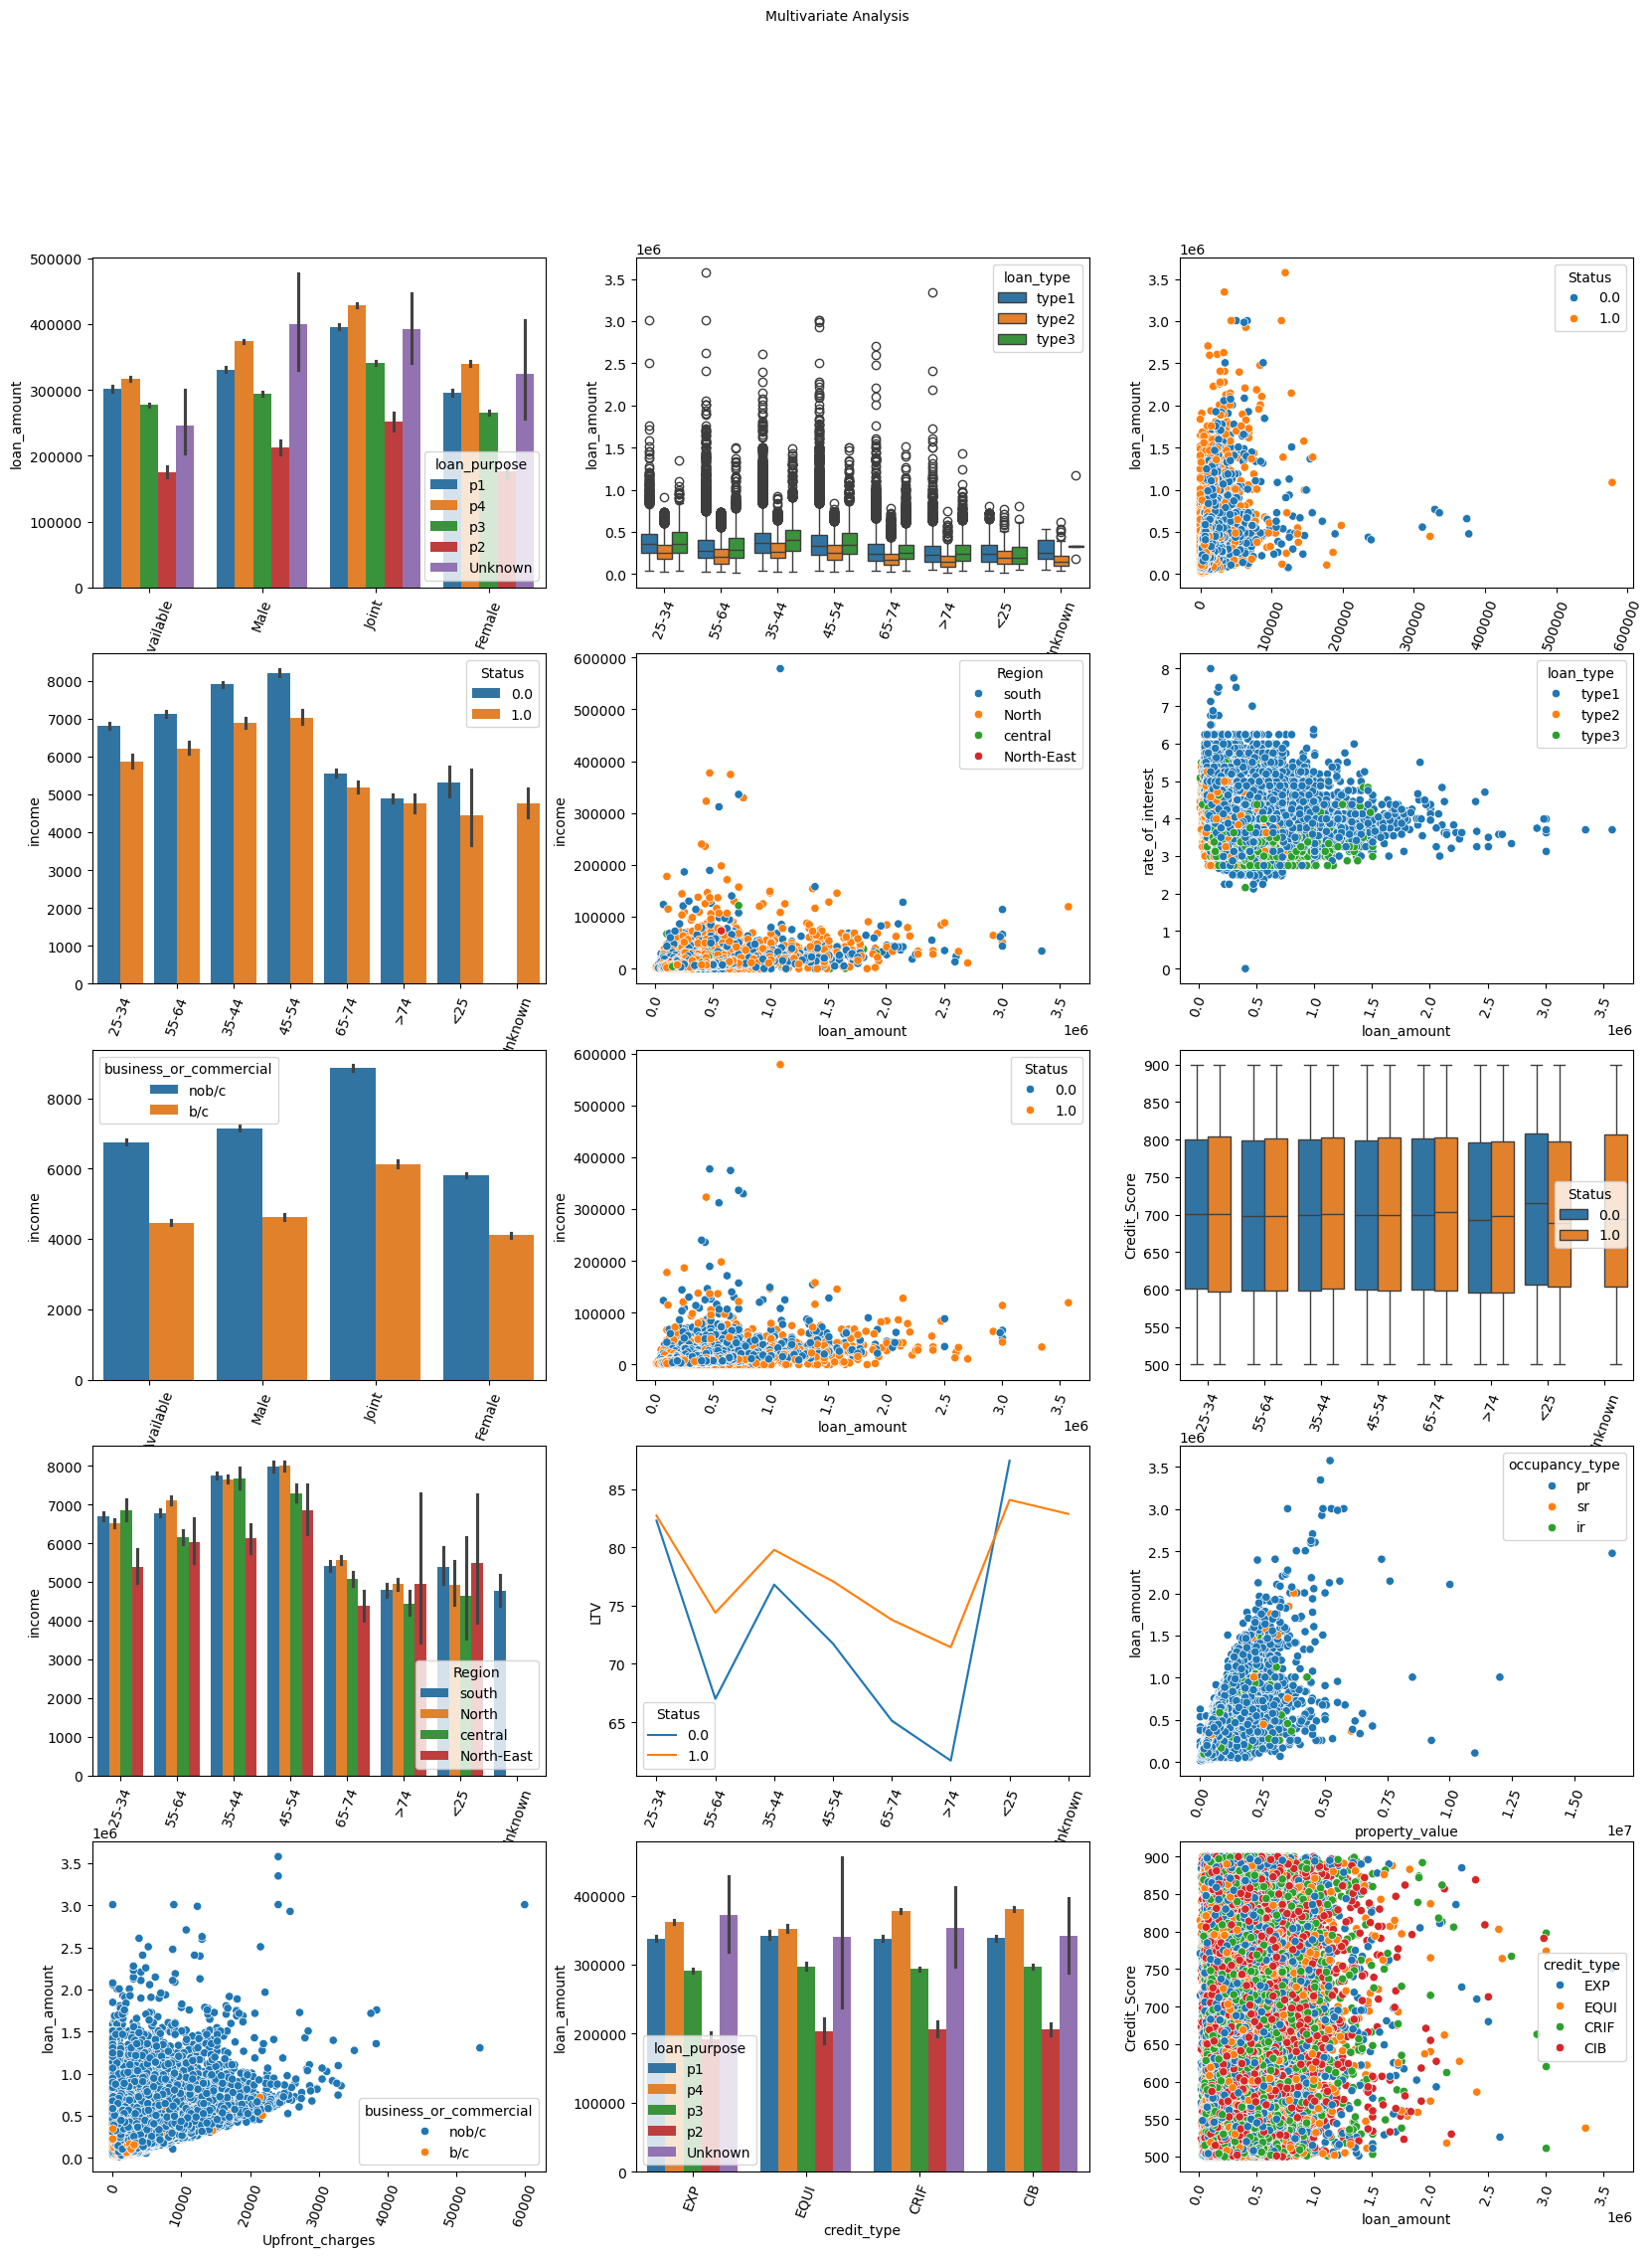

In [186]:
plt.figure(figsize = (20,25)).suptitle("Multivariate Analysis",fontsize = 10)
ax = plt.subplot(5,3,1)
sns.barplot(x= dfs['Gender'], y = dfs['loan_amount'],hue = dfs['loan_purpose'])
plt.xticks(rotation = 70,fontsize = 10)

ax = plt.subplot(5,3,2)
sns.boxplot(x= dfs['age'], y = dfs['loan_amount'],hue = dfs['loan_type'])
plt.xticks(rotation = 70,fontsize = 10)

ax = plt.subplot(5,3,3)
sns.scatterplot(x= dfs['income'], y = dfs['loan_amount'],hue=dfs['Status'])
plt.xticks(rotation = 70,fontsize = 10)

ax = plt.subplot(5,3,4)
sns.barplot(x= dfs['age'], y = dfs['income'],hue =dfs['Status'])
plt.xticks(rotation = 70,fontsize = 10)

ax = plt.subplot(5,3,5)
sns.scatterplot(x= dfs['loan_amount'], y = dfs['income'],hue=dfs['Region'])
plt.xticks(rotation = 70,fontsize = 10)

ax = plt.subplot(5,3,6)
sns.scatterplot(x= dfs['loan_amount'], y = dfs['rate_of_interest'],hue=dfs['loan_type'])
plt.xticks(rotation = 70,fontsize = 10)

ax = plt.subplot(5,3,7)
sns.barplot(x= dfs['Gender'], y = dfs['income'],hue = dfs['business_or_commercial'])
plt.xticks(rotation = 70,fontsize = 10)

ax = plt.subplot(5,3,8)
sns.scatterplot(x= dfs['loan_amount'], y = dfs['income'],hue =dfs['Status'])
plt.xticks(rotation = 70,fontsize = 10)

ax = plt.subplot(5,3,9)
sns.boxplot(x= dfs['age'], y = dfs['Credit_Score'],hue =dfs['Status'])
plt.xticks(rotation = 70,fontsize = 10)

ax = plt.subplot(5,3,10)
sns.barplot(x= dfs['age'], y = dfs['income'],hue =dfs['Region'])
plt.xticks(rotation = 70,fontsize = 10)

ax = plt.subplot(5,3,11)
sns.lineplot(x= dfs['age'], y = dfs['LTV'],hue=dfs['Status'],ci=False)
plt.xticks(rotation = 70,fontsize = 10)

ax = plt.subplot(5,3,12)
sns.scatterplot(x= dfs['property_value'],y = dfs['loan_amount'],hue =dfs['occupancy_type'])
plt.xticks(rotation = 70,fontsize = 10)

ax = plt.subplot(5,3,13)
sns.scatterplot(x= dfs['Upfront_charges'],y = dfs['loan_amount'],hue =dfs['business_or_commercial'])
plt.xticks(rotation = 70,fontsize = 10)

ax = plt.subplot(5,3,14)
sns.barplot(x= dfs['credit_type'],y = dfs['loan_amount'],hue =dfs['loan_purpose'])
plt.xticks(rotation = 70,fontsize = 10)

ax = plt.subplot(5,3,15)
sns.scatterplot(x= dfs['loan_amount'],y = dfs['Credit_Score'],hue =dfs['credit_type'])
plt.xticks(rotation = 70,fontsize = 10)

plt.show()


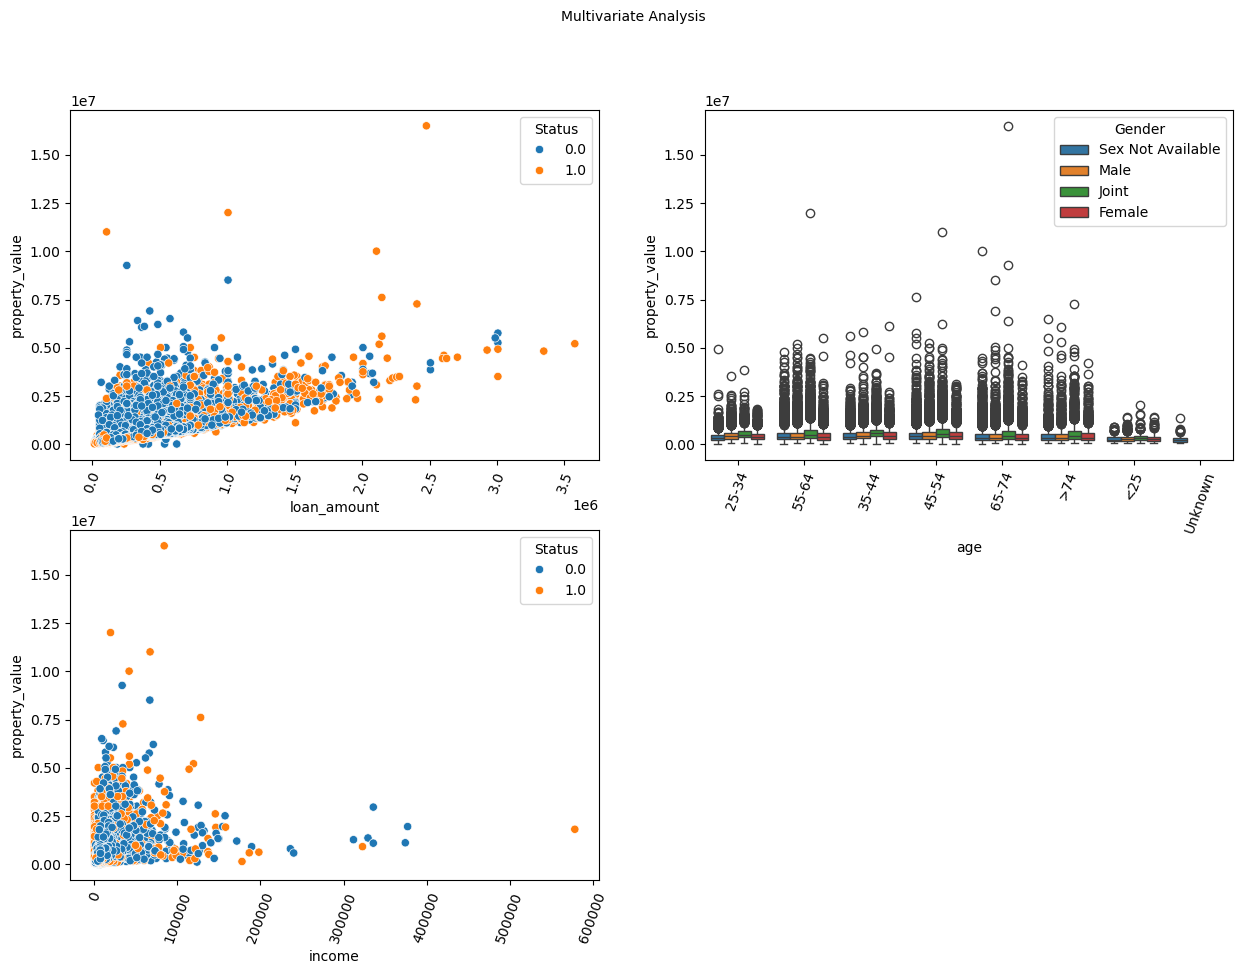

In [334]:
plt.figure(figsize = (15,10)).suptitle("Multivariate Analysis",fontsize = 10)
ax = plt.subplot(2,2,1)
sns.scatterplot(x= dfs['loan_amount'], y = dfs['property_value'],hue = dfs['Status'])
plt.xticks(rotation = 70,fontsize = 10)

ax = plt.subplot(2,2,2)
sns.boxplot(x= dfs['age'], y = dfs['property_value'],hue = dfs['Gender'])
plt.xticks(rotation = 70,fontsize = 10)

ax = plt.subplot(2,2,3)
sns.scatterplot(x= dfs['income'], y = dfs['property_value'],hue = dfs['Status'])
plt.xticks(rotation = 70,fontsize = 10)


plt.show()

**Insight for Multivariate Analysis**

1. We can see loan purpose types p4,p1 and unknown types are popular among Gender types Male and joint.
2. 
2.loan type 1 and 3 are falling in higher loan amount range among the age groups 25-34, 35-44 and 45-54.

4. loan amount and income seems to have slightest positive correlation but we can notice that most of the customers with
    lower income and higher loan brackets are defaulting.
   
6. Customers between age groups 25-54 seems to have higher income but in the same groups we can see customers defaulting also quite higher with lesser income.


5. Customers from Region North and south seems to get loan than other region customers.
    
6. We don't see much correlation between ROI and loan amount but loan type 1 is opted for highly.

7. Male and joint gender types customer seems to have higher income range and 
joint type customers are opting for commercial establishment more.

8. All the Age group having credit score around 700 on the average but they also have the defaulting customers in the same range.

9. Customers from Age groups 45-54, 35-44, 25-34 and 55-64 are with higher income from south and north region whereas customer between age 25 - 54 with higher income are from central region as well.
10. We can see customers below 25 and 35-44 seems to provide higher LTV also high possibility of defaulting whereas customers between 55-64 and above 74 are providing lower LTV and default % is lower. Customers LTV between age groups 45-54 starts to fall as well as the loan default %.
11. Property value and loan amount are positively correlated slightly and most of the customers are from occupancy type pr.
12. We can say loan amount and upfront charges are slightly positively correlated and most of the values are from commercial establishment.
13. Credit type EXP and CRIF having higher loan amount in the unknown loan purpose category and p1,p4 and p3 loan purpose seems to be quite higher in credit types EXP,CIB and CRIF.
14. Customer between age 45-64 and above 74 seems to have higher property value in Gender type joint.


**Recommendation**

1. We can recommend bank to acquire customers from commercial establishment than business.
2. Bank can focus on Joint and Male Gender types for lending since they are mostly picking higher loan amount with higher income 
and opting for commercial establishments with higher property value.
3. Bank can acquire customers between age group 25 - 54 with higher income.
4. Customers from North, South and central Regions are borrowing higher loan amount as well as having high income.
5. Bank can focus on customers in age groups below 25 and between 35-45 with higher income since they bring higher LTV. 
Higher income may reduces the possibility of defaaulting. Customer in age group between 55-64 and above 75 is having lower LTV but default % also lesser.
6. Bank can provide moderate loan amounts to customers with higher property values, moderate to higher income and Gender type to be joint.